# Naive Bayes

## 1 = positive
## 0 = negative

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    30000 non-null  object
 1   label   30000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 468.9+ KB


,text,label
0,Tim Burton is in essence an expressionist film...,1
1,This tale based on two Edgar Allen Poe pieces ...,1
2,"Dead or Alive: Final, the movie that supposedl...",1
3,Certainly this film has the ring of truth abou...,1
4,It pains me to say this about an Australian fi...,0


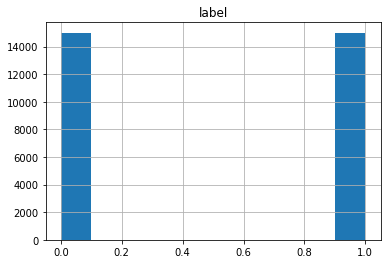

In [1]:
import pandas as pd

df_train = pd.read_json("../data/aclIMDB_train.json", orient="records")
df_train.info()
df_train.hist()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10000 non-null  object
 1   label   10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


,text,label
0,This was Barbra Streisand's first television s...,1
1,"I am, as many are, a fan of Tony Scott films. ...",0
2,A young scientist Harry Harrison is continuing...,0
3,"Anthony McGarten has adapted his play, Via Sat...",1
4,"I was watching this movie on Friday,Apr 7th. I...",1


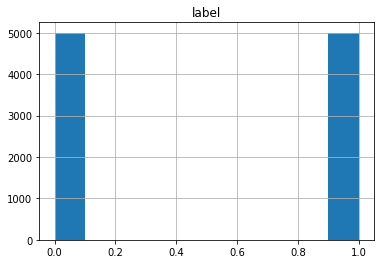

In [2]:
df_val = pd.read_json("../data/aclIMDB_val.json", orient="records")
df_val.info()
df_val.hist()
df_val.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10000 non-null  object
 1   label   10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


,text,label
0,This movie features Charlie Spradling dancing ...,0
1,L'Hypothèse du tableau volé/The Hypothesis of ...,1
2,Surprisingly well made little movie. Short in ...,1
3,I rented this because I'm a bit weary of '80s ...,0
4,"Twenty years ago, the five years old boy Micha...",0


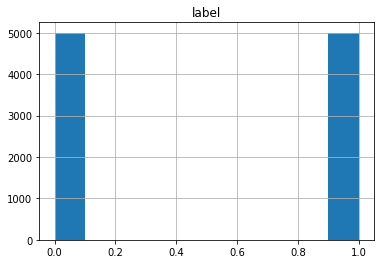

In [3]:
df_test = pd.read_json("../data/aclIMDB_test.json", orient="records")
df_test.info()
df_test.hist()
df_test.head()

In [4]:
def sentiment(value):
    if(value == 1):
        return "positive"
    else:
        return "negative"

df_train["sentiment"] = [None] * len(df_train)
df_train["sentiment"] = df_train["label"].apply(sentiment)
df_val["sentiment"] = [None] * len(df_test)
df_val["sentiment"] = df_val["label"].apply(sentiment)
df_test["sentiment"] = [None] * len(df_test)
df_test["sentiment"] = df_test["label"].apply(sentiment)

In [5]:
df_train[df_train["label"] == 1][:1000]

,text,label,sentiment
0,Tim Burton is in essence an expressionist film...,1,positive
1,This tale based on two Edgar Allen Poe pieces ...,1,positive
2,"Dead or Alive: Final, the movie that supposedl...",1,positive
3,Certainly this film has the ring of truth abou...,1,positive
6,At first I thought this film was going to anno...,1,positive
...,...,...,...
1960,i see hundreds of student films- this is tops....,1,positive
1962,Many animation buffs consider Wladyslaw Starew...,1,positive
1963,I think that Never Been Kissed was a totally a...,1,positive
1966,"This Roscoe ""Fatty"" Arbuckle comedy is best re...",1,positive


In [6]:
df_train.shape

(30000, 3)

## Pre-processing

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')

STOPWORDS = stopwords.words("english")

STOPWORDS[:10]

[nltk_data] Downloading package stopwords to C:\Users\opell.DESKTOP-
[nltk_data]     UEQ8DPV\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [8]:

def is_html_tag(word):
    w = word.replace("\n", "")
    return w.startswith("<") or w.startswith(">") or w.startswith("/") or w.strip()[:2] == "br"

def remove_html_tags(sentence):
    #separate_tags = sentence.replace("<", " < ")
    #separate_tags = separate_tags.replace(">", " > ")

    single_spaces = " ".join(str(sentence).split())

    return " ".join([token for token in single_spaces.split(" ") if not is_html_tag(token)])

In [9]:
remove_html_tags("""
<html>
<body
    <h1> <br> Hello, there br> </h1>
    <p> General Kenobi </p>
</body>
</html>
""")

'Hello, there General Kenobi'

In [10]:
df_train["text"].head(5)

0    Tim Burton is in essence an expressionist film...
1    This tale based on two Edgar Allen Poe pieces ...
2    Dead or Alive: Final, the movie that supposedl...
3    Certainly this film has the ring of truth abou...
4    It pains me to say this about an Australian fi...
Name: text, dtype: object

In [11]:
df_train["text"] = df_train["text"].apply(remove_html_tags)

In [12]:
df_train["text"].head(5)

0    Tim Burton is in essence an expressionist film...
1    This tale based on two Edgar Allen Poe pieces ...
2    Dead or Alive: Final, the movie that supposedl...
3    Certainly this film has the ring of truth abou...
4    It pains me to say this about an Australian fi...
Name: text, dtype: object

In [13]:
nltk.download('punkt')

tokenized_reviews = df_train["text"].apply(lambda review_text: word_tokenize(review_text.lower()))

tokenized_reviews.head()

[nltk_data] Downloading package punkt to C:\Users\opell.DESKTOP-
[nltk_data]     UEQ8DPV\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [tim, burton, is, in, essence, an, expressioni...
1    [this, tale, based, on, two, edgar, allen, poe...
2    [dead, or, alive, :, final, ,, the, movie, tha...
3    [certainly, this, film, has, the, ring, of, tr...
4    [it, pains, me, to, say, this, about, an, aust...
Name: text, dtype: object

In [14]:
d = dict()

for review in tokenized_reviews:
    for word in review:
        if word not in STOPWORDS and word.isalpha():
            d[word] = d.get(word, 0) + 1
            

In [15]:
d["br"]

52402

In [16]:
del d["br"]

In [17]:
DESIRED_VOCAB_SIZE = 4000


VOCAB = [k for k,v in sorted(d.items(), key=lambda item: item[1], reverse=True)[:DESIRED_VOCAB_SIZE]]

In [18]:
VOCAB[:10]

['movie',
 'film',
 'one',
 'like',
 'good',
 'would',
 'even',
 'time',
 'see',
 'really']

In [19]:
word_table = pd.DataFrame({"word": VOCAB})
word_table.to_json("../data/vocab.json", orient="records")

In [20]:
word_table = pd.read_json("../data/vocab.json", orient="records")
word_table.info()
word_table.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    4000 non-null   object
dtypes: object(1)
memory usage: 31.4+ KB


,word
0,movie
1,film
2,one
3,like
4,good
5,would
6,even
7,time
8,see
9,really


## Naive Bayes

In [21]:
dict_freqs = {"positive": {}, "negative": {}}

In [22]:
VOCAB_IDX = {}
for i in range(0, len(word_table["word"].values)):
    VOCAB_IDX[word_table["word"].values[i]] = i

for idx in range(df_train.shape[0]):
    review = df_train.iloc[idx]["text"]
    sentiment = df_train.iloc[idx]["sentiment"]
    
    for word in review.split(" "):
        if word in VOCAB_IDX:
            dict_freqs[sentiment][word] = dict_freqs[sentiment].get(word, 0) + 1

In [23]:
dict_freqs["positive"]["good"]

6667

In [24]:
dict_freqs["negative"]["good"]

6814

In [25]:
dict_freqs["negative"]["bad"]

6045

In [26]:
dict_freqs["positive"]["bad"]

1652

In [27]:
word_table.head()

,word
0,movie
1,film
2,one
3,like
4,good


In [28]:
total_positive = sum(dict_freqs["positive"].values())

word_table["positive"] = [(dict_freqs["positive"].get(w, 0) + 1) / (total_positive + len(VOCAB))  for w in word_table["word"]]

In [29]:
total_negative = sum(dict_freqs["negative"].values())

word_table["negative"] = [(dict_freqs["negative"].get(w, 0) + 1) / (total_negative + len(VOCAB))  for w in word_table["word"]]

In [30]:
word_table.head()

,word,positive,negative
0,movie,0.016191,0.021177
1,film,0.017907,0.015266
2,one,0.013214,0.012250
3,like,0.009628,0.012442
4,good,0.006899,0.006964


In [31]:
import numpy as np

word_table["ratio"] = np.log(word_table["positive"] / word_table["negative"])

In [32]:
word_table.head()

,word,positive,negative,ratio
0,movie,0.016191,0.021177,-0.268473
1,film,0.017907,0.015266,0.159564
2,one,0.013214,0.012250,0.075699
3,like,0.009628,0.012442,-0.256404
4,good,0.006899,0.006964,-0.009378


In [33]:
word_table = word_table.set_index("word")

In [34]:
word_table.head()

,positive,negative,ratio
word,,,
movie,0.016191,0.021177,-0.268473
film,0.017907,0.015266,0.159564
one,0.013214,0.012250,0.075699
like,0.009628,0.012442,-0.256404
good,0.006899,0.006964,-0.009378


In [35]:
word_table["ratio"].describe()

count    4000.000000
mean        0.042331
std         0.598998
min        -2.845582
25%        -0.259006
50%         0.050027
75%         0.392723
max         2.675016
Name: ratio, dtype: float64

In [36]:
word_table["word"] = word_table.index
word_table.head()

,positive,negative,ratio,word
word,,,,
movie,0.016191,0.021177,-0.268473,movie
film,0.017907,0.015266,0.159564,film
one,0.013214,0.012250,0.075699,one
like,0.009628,0.012442,-0.256404,like
good,0.006899,0.006964,-0.009378,good


In [37]:
word_table.to_json("../data/word_table.json",orient="records")

## Predicting

In [38]:
import pandas as pd

word_table = pd.read_json("../data/word_table.json", orient="records")
word_table.head()

,positive,negative,ratio,word
0,0.016191,0.021177,-0.268473,movie
1,0.017907,0.015266,0.159564,film
2,0.013214,0.012250,0.075699,one
3,0.009628,0.012442,-0.256404,like
4,0.006899,0.006964,-0.009378,good


In [39]:
word_table = word_table.set_index("word")
word_table.head()

,positive,negative,ratio
word,,,
movie,0.016191,0.021177,-0.268473
film,0.017907,0.015266,0.159564
one,0.013214,0.012250,0.075699
like,0.009628,0.012442,-0.256404
good,0.006899,0.006964,-0.009378


In [40]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

STOPWORDS = stopwords.words("english")

def is_html_tag(word):
    w = word.replace("\n", "")
    return w.startswith("<") or w.startswith(">") or w.startswith("/") or w.strip()[:2] == "br"

def remove_html_tags(sentence):
    #separate_tags = sentence.replace("<", " < ")
    #separate_tags = separate_tags.replace(">", " > ")

    single_spaces = " ".join(str(sentence).split())

    return " ".join([token for token in single_spaces.split(" ") if not is_html_tag(token)])

def predict_for_review_raw(review):
    _input = remove_html_tags(review)
    _input = word_tokenize(_input.lower())

    word_table_words = word_table.index

    return sum([word_table["ratio"].loc[token] for token in _input if token in word_table_words])

In [41]:
predict_for_review_raw("This movie sucks.")

-1.7170618902

In [42]:
predict_for_review_raw("This movie was fantastic!")

1.2317198384

In [43]:
def predict_for_review(review):
    return int(predict_for_review_raw(review) > 0)

In [44]:
preds = df_train["text"].apply(predict_for_review)

preds

0        1
1        1
2        1
3        1
4        0
        ..
29995    1
29996    0
29997    0
29998    0
29999    0
Name: text, Length: 30000, dtype: int64

In [45]:
real = (df_train["sentiment"] == "positive").astype(int)

In [46]:
def get_accuracy(preds, real):
    return sum(preds == real) / len(real)

In [47]:
print(f"Training set accuracy: {get_accuracy(preds, real)}")

Training set accuracy: 0.8544333333333334


In [48]:
preds_val = df_val["text"].apply(predict_for_review)
real_val = (df_val["sentiment"] == "positive").astype(int)
print(f"Validation set accuracy: {get_accuracy(preds_val, real_val)}")

Validation set accuracy: 0.8415


In [49]:
preds_test = df_test["text"].apply(predict_for_review)
real_test = (df_test["sentiment"] == "positive").astype(int)
print(f"Test set accuracy: {get_accuracy(preds_test, real_test)}")

Test set accuracy: 0.8419
